This notebook shows how to perform PCA decomposition step by step on the dataset of handwritten digits. The notebook shows:

1. How to transform the dataset to 2 dimensions using PCA in numpy
2. How to select the number of components
3. How plotting the components helps to understand data
4. What do the principal components actually mean
5. How to perform PCA using scikit-learn with the same results

The notebook served originally as a task for Data Mining student at the University of Hamburg.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Import dataset containing grayscale digits
The dataset of handwritten digits is incorporated in scikit-learn and can be easily imported using `from sklearn.datasets import load_digits`.

Digits are represented as a 64 dimensional vector (8x8) of integers from 0 (white) to 16 (black)

In [2]:
from sklearn.datasets import load_digits
dataset = load_digits()
digits = dataset.data
target = dataset.target

### Visualize a digit
This is an example of a digit 0.

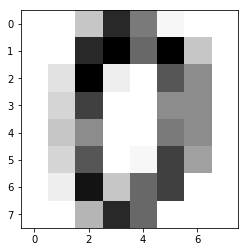

In [3]:
plt.imshow(digits[0].reshape(8,8),cmap='Greys')

## PCA Implementation

### 1. Compute covariation matrix
First we have to compute the covariation matrix **C** defined as
$$\mathbf{C} = \frac{\sum_{i=1}^N (\mathbf{x}_i-\mathbf{\bar{x}}) (\mathbf{x}_i-\mathbf{\bar{x}})^\mathrm{T}}{N-1}$$

where
- $\mathbf{x}_i$ is the vector representing the $i$-th datapoint (64 dimensional vector of the $i$-th digit)
- $\mathbf{\bar{x}}$ is the mean vector of the whole dataset
- $N$ is the number of datapoints

In [4]:
### SOLUTION 1 computing the covariance matrix by definition
mean_vec = np.mean(digits, axis=0)
cov_mat = (digits - mean_vec).T.dot((digits - mean_vec)) / (digits.shape[0] - 1)

In [5]:
### SOLUTION 2 using numpy's cov function
cov_mat = np.cov(digits.T)

### 2. Compute eigenvalues and eigenvectors
If we use `np.linalg.eig`, no sorting is needed as the returned output is already sorted.

The eigenvectors are the columns of `eig_vecs` matrix.

In [6]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

### 3. Project digits to first two principal components
(don't forget to do the mean normalization of the digits before transforming)

In [7]:
projected_digits = (digits - mean_vec).dot(eig_vecs[:,:2])

### 4. Explained variance
In our example we transform the dataset using the first two principal components. For high-dimensional datasets, one would usually use more dimensions. A good technique to determine an appropriate number of components is looking at the *explained variance*.

Explained variance for first $k$ components says how much variance of the original data is kept when transforming the dataset to its first $k$ principal components. It is computed as the proportion of first (and also largest) $k$ eigenvalues divided by the total sum of all the eigenvalues.

So how many components do we need to keep 90 % of the variance?

In [8]:
EXPLAINED_VARIANCE_THRESHOLD = 0.9
cum_var_exp = np.cumsum(eig_vals) / sum(eig_vals)

# on a boolean array, argmax returns index of first True
# +1 because indexed from zero
no_of_components = np.argmax(cum_var_exp >= EXPLAINED_VARIANCE_THRESHOLD) + 1
print('First %d principal components explain %.2f %% of the variance.'
      % (no_of_components, 100 * cum_var_exp[no_of_components - 1]))

First 21 principal components explain 90.32 % of the variance.


**Plot the explained variance based on the number of principal components.**

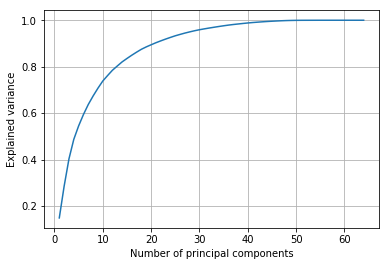

In [9]:
n = len(eig_vals)
plt.plot(np.arange(1, len(eig_vals) + 1), cum_var_exp)
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance')
plt.grid()
plt.show()

### 5. Plotting digit classes based on first two principal components
Let us now plot the digits transformed to their first two principal components.

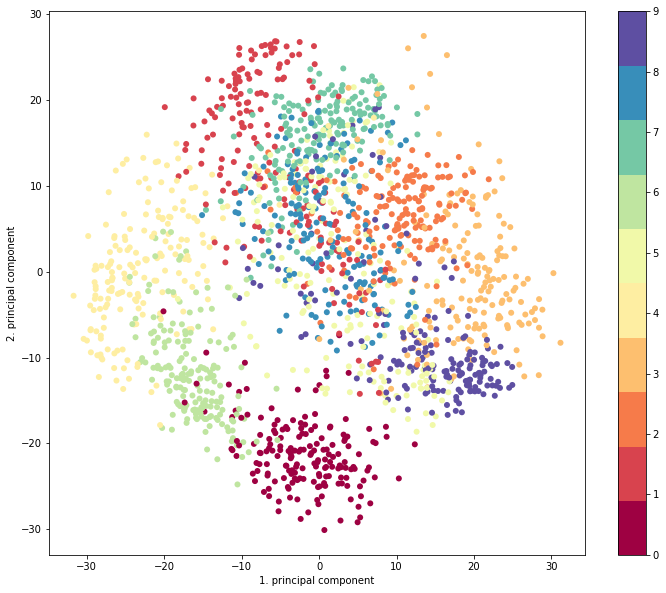

In [10]:
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
plt.figure(figsize=(12, 10))
plt.scatter(projected_digits[:, 0], projected_digits[:, 1],
            c=target, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('1. principal component')
plt.ylabel('2. principal component')
plt.colorbar();

**The scatter plot shows as, how much are the digits similar to the first two similar components. Let's look at the first two principal components:**

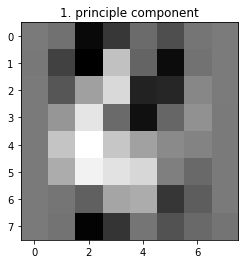

In [11]:
plt.title('1. principle component')
plt.imshow(eig_vecs[:,0].reshape(8,8),cmap='Greys')
plt.show()

The first principle component has high values in the upper part of the image and low values in the left part of the image. 

Therefore digits with dark pixels at the top and white pixels at the left, such as $\bf{3}$ or $\bf{9}$, are situated on the right part of the scatter plot with the first principal component high. 
Digit $\bf{4}$, however, has lot of dark pixels on the left part and only few at the top. Being more or less a negative of the 1. principal component, the digit is situated to the left of the scatter plot with highly negative 1. principal component.

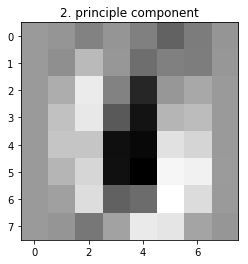

In [12]:
plt.title('2. principle component')
plt.imshow(eig_vecs[:,1].reshape(8,8),cmap='Greys')
plt.show()

The second principal component is a bit easier to understand. Digits with dark pixels in the middle have a high 2. principal components (such as $\bf{1}$).
Digits with only white pixels in the middle have a highly negative second principal component (such as **0**).

# Using PCA from sklearn
The previous steps were to demonstrate how PCA works. In a real project, you would probably use the `PCA` class from `sklearn.decomposition`.

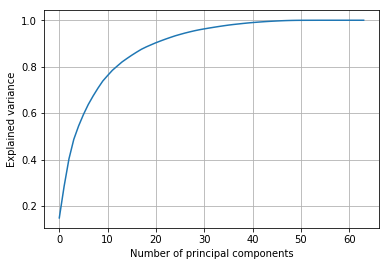

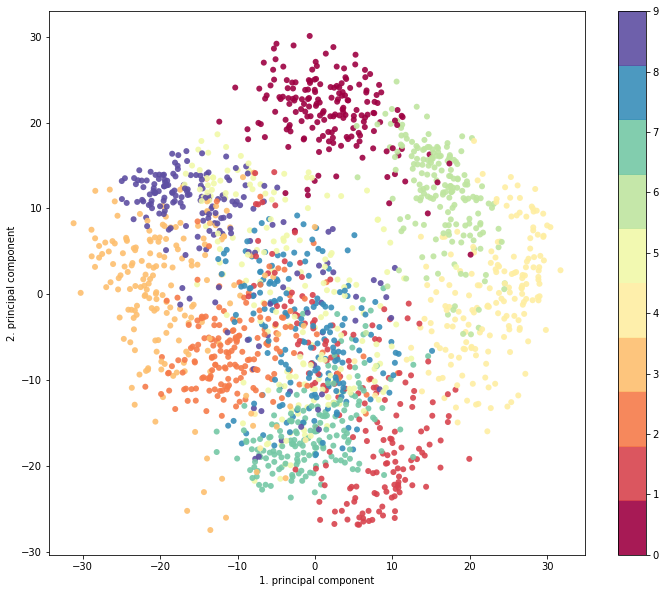

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
projected = pca.fit_transform(digits)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance')
plt.grid()
plt.show()

plt.figure(figsize=(12, 10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=target, edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('1. principal component')
plt.ylabel('2. principal component')
plt.colorbar();

When transforming the dataset to the first 2 principal components using sklearn's PCA, we get the same result as before, just mirrored throught the central point.